In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [7]:
data=pd.read_csv('data/headstart.csv')
len_before=len(data.index)
data=data.dropna(how='any',subset=['povrate60','mort_age59_related_postHS','census1960_pop'])
len_after=len(data.index)
print('Dropped',len_before-len_after,'lines that contain NaN.')
threshold=59.1984

Dropped 26 lines that contain NaN.


In [17]:
def ker_tri(x):
    return 2*(1-x)

In [18]:
def ker_rect(x):
    return 1 # Note that the constant here will not affect the result

In [19]:
def get_interval(X,Y,a,b):
    return X[np.logical_and(a<X,X<b)],Y[np.logical_and(a<X,X<b)]

In [73]:
# Left regression only
def bias1(X,Y,t,k,b):
    X0=X[np.logical_and(t-b<X,X<t)]
    X1=X0-t                             #take threshold to x=0
    Y1=Y[np.logical_and(t-b<X,X<t)]
    get_weight=np.vectorize(lambda x:k((np.abs(x))/b))
    WL=get_weight(X1)
    XW=X1*WL                            #weighted X1
    XXW=X1**2*WL                        #weighted X1^2
    YW=Y1*WL                            #weighted Y1
    #averages
    Wsum=np.sum(WL)
    XXavg=np.sum(XXW)/Wsum
    Xavg=np.sum(XW)/Wsum
    Yavg=np.sum(YW)/Wsum
    regr = linear_model.LinearRegression()
    regr.fit(X1.values.reshape(-1,1), Y1, sample_weight=WL)
    a=regr.coef_                        #find the slope of regression
    f1=WL*((a*(X1-Xavg)-(Y1-Yavg))**2)
    f2=WL*(X1-XXavg)**2
    n=np.size(X1)
    F=XXavg*np.sum(f1)/((n-2)*np.sum(f2))
    return F

The x-axis is the bandwidth, and the y-axis is the error caused by data variance.

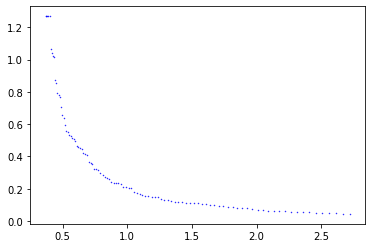

In [76]:
X=data['povrate60']
Y=data['mort_age59_related_postHS']
restriction=Y<=40
X=X[restriction]
Y=Y[restriction]
def test_bandwidth(X,Y,t,k,vald):
    for i in np.exp(np.linspace(-1,1,100)):
        err=(vald(X,Y,t,k,i)+vald(-X,Y,-t,k,i))/2
        plt.scatter(i, err, s=0.2, color='blue')
    plt.show()
    
test_bandwidth(X,Y,threshold,ker_tri,bias1)